# Анализ оттока клиентов банка "Метанпром"

## Материалы

Ссылка на дашборд
https://public.tableau.com/views/Final_project_16817215886730/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

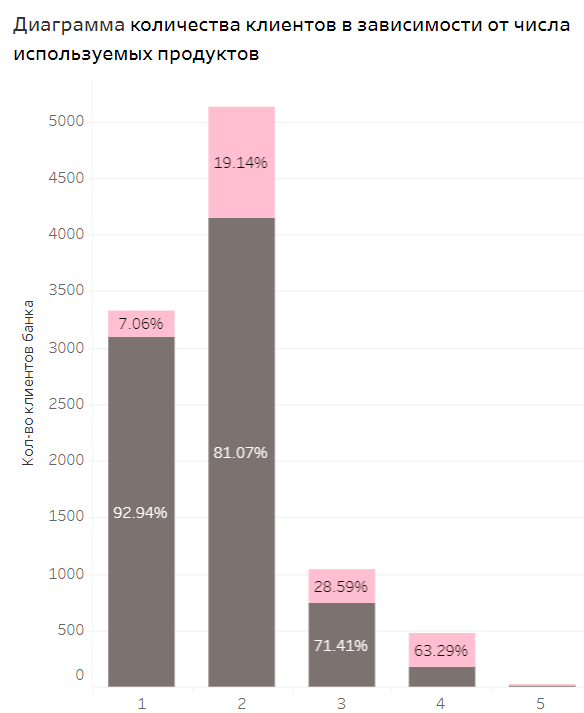


Ссылка на презентацию https://drive.google.com/file/d/1FahIKRtFL-sDgEmQo7S7GITUKU-Ger9j/view?usp=share_link

## Декомпозиция

1. Загрузка данных и импорт необходимых библиотек.
2. Предобработка данных:
    * 2.1. Проверка и приведение к корректному типу данных.
    * 2.2. Проверка на корректность наименований колонок.
    * 2.3. Проверка на наличие пропусков.
    * 2.4. Проверка на наличие дубликатов.
    * 2.5. Проверка значений на наличие выбросов.
    * 2.6. Кодирование части данных.
    * 2.7. Промежуточный вывод.

3. Исследовательский анализ данных:
    * 3.1. Категоризация части данных.
    * 3.2. Анализ оттока клиентов в разрезе различных параметров (город, пол, возраст).
    * 3.3. Составление портретов уходящих клиентов.
    * 3.4. Промежуточный вывод.

4. Статистический анализ данных:
    * 4.1. Формулирование и проверка первой гипотезы.
    * 4.2. Формулирование и проверка второй гипотезы.
    * 4.4. Формулирование и проверка третий гипотезы.
    * 4.5. Формулирование и проверка четвертой гипотезы.
    * 4.6. Формулирование и проверка пятой гипотезы.
    * 4.7. Формулирование промежуточных выводов на основе статистического анализа.
    * 4.8. Промежуточный вывод.

5. Сегментация пользователей и их приоритизация:
    * 5.1. Определение сегментов пользователей.
    * 5.2. Преоритизация сегментов пользователей.
    * 5.3. Промежуточный вывод.

6. Итоговые выводы и рекомендации по каждому из сегментов:
    * 6.1. Общие выводы о поведении и предпочтениях каждого сегмента.
    * 6.2. Рекомендации по удержанию клиентов и увеличению прибыли в каждом сегменте.

## Описание проекта <a id="1"></a>

 Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, как клиенты пользуются нашими услугами, а так же поможет нам составить портрет клиентов, которые склонны уходить из банка.
«Метанпромбанк» — деньги не пахнут!


## Описание данных <a id="2"></a>

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Last_activity` — активный клиент,
- `Estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Цели исследования <a id="3"></a>

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*

## Загрузка данных и импорт необходимых библиотек<a id="5"></a>

In [1]:
#импорт сторонних библиотек
!pip install phik
import phik

!pip install missingno
import missingno as msno

In [2]:
#импорт базовых библиотек
import pandas as pd
import numpy as np

#импорт библиотек визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import plotly.graph_objs as go

#импорт библиотек статистических методов
from scipy import stats as st
from scipy.stats import pearsonr
from scipy.stats import shapiro

#импорт библиотек ML
from sklearn.ensemble import RandomForestClassifier

In [3]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [4]:
# функция для получения основной информации о датафрейме
def data_info(rest_data):
    display(rest_data.head(10)) #вывод первых 10 значений
    display(rest_data.isna().sum()) # кол-во пропусков
    display(rest_data.describe()) # статист-е пок-и
    rest_data.info()
    print('Кол-во дублей в строках: {}'.format(rest_data.duplicated().sum()))

In [5]:
pd.set_option('display.max_colwidth', False)
data_info(df)  

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


USERID           0   
score            0   
city             0   
gender           0   
age              26  
equity           0   
balance          2295
products         0   
credit_card      0   
last_activity    0   
EST_SALARY       0   
churn            0   
dtype: int64

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
Кол-во дублей в строках: 0


### Промежуточный вывод

В датасете 10000 строк, обнаружены пропуски в столбцах age и balance. Также стоит привести названия столбцов к нижнему регистру и "змеиному" стилю и подкорректировать тип данных в некоторых столбцах. Явных дубликатов нет, выбросов тоже.

## Предобработка данных

In [6]:
#приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
#изменяю на змеиный стиль
df = df.rename (columns = {'userid':'user_id'})

In [8]:
#Так же приведем к нижнему регистру все значения их столбцов содержащих текст
list_to_lower = ['city','gender']
for column in list_to_lower:
    df[column] = df[column].str.lower()

In [9]:
#изменим тип данных
df['score'] = df['score'].astype('int')

#Скоринговый балл — это трёхз начное число, обычно от 0 до 100 или от 1 до 999, указывающее на степень кредитного риска. 

In [10]:
#найдем неявные дубликаты
duplicates = df[df.duplicated(subset=['score', 'city', 'gender', 'est_salary'], keep=False)]
duplicates = duplicates.sort_values(by='score')
duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [11]:
#найдем дубликаты в user_id
duplicates = df['user_id'].duplicated().sum()
duplicates

73

In [12]:
duplicates = df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id')
duplicates

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,рыбинск,ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887,ярославль,ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880,ярославль,ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855,рыбинск,ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,ярославль,м,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990,ярославль,м,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840,рыбинск,м,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839,ярославль,м,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839,рыбинск,м,39.0,5,507199.85,3,0,1,85195.80,0


In [13]:
#удаляю дубликаты, так как их процент ~1
df['user_id'] = df['user_id'].drop_duplicates().reset_index(drop=True)

In [14]:
df = df.dropna(subset=['user_id'])

In [15]:
#изменим тип данных
df['user_id'] = df['user_id'].astype('int')

In [16]:
#При ознакомлении с таблицей внимание привлекает минимальное значение в столбце products - 0.
#Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом.
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,185535,962,рыбинск,ж,79.0,3,NaN,0,0,0,25063.96,1


In [17]:
#Судя по всему, 0 в столбце products появился потому что этот клиент ушел из банка и теперь действительно
#больше не пользуется банковскими продуктами. Однако для целей анализа нам необходимо изучать
#последние актуальные данные на момент, когда отточные пользователи еще являлись клиентами банка, 
#поэтому эту строку необходимо удалить.

df = df[df['products']!=0]
df['products'].describe()

count    9926.000000
mean     1.870341   
std      0.792161   
min      1.000000   
25%      1.000000   
50%      2.000000   
75%      2.000000   
max      5.000000   
Name: products, dtype: float64

In [18]:
#кодирование пола
df['gender'] = df['gender'].replace({'ж': 0, 'м': 1})

In [19]:
#кодирование пропусков в balance
df['balance_missing'] = df['balance'].isna().astype(int)

In [20]:
#кодирование города
dummies = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, dummies], axis=1)

In [21]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,city_ростов,city_рыбинск,city_ярославль
0,183012,850,рыбинск,0,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,рыбинск,0,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,рыбинск,0,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866,ярославль,0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,ярославль,1,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1


In [22]:
#матрица корреляции для всех переменных в наборе данных
corr_with_missing = df.corr()
corr_with_missing

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,city_ростов,city_рыбинск,city_ярославль
user_id,1.000000,-0.001231,0.007149,-0.004606,0.004860,0.005888,0.006217,-0.024463,-0.012747,0.009080,-0.002671,-0.005939,-0.004719,0.002852,0.000771
score,-0.001231,1.000000,0.011398,-0.011782,0.064414,0.235860,-0.004316,-0.095700,-0.030092,0.164221,0.105980,0.137944,-0.037374,-0.000785,0.027181
gender,0.007149,0.011398,1.000000,-0.211896,-0.021414,0.051548,-0.023487,0.127848,-0.014607,0.082696,0.140157,0.063218,-0.014613,-0.015863,0.024654
age,-0.004606,-0.011782,-0.211896,1.000000,0.020083,0.069652,0.016862,-0.122332,-0.007086,-0.038993,-0.050811,-0.029488,0.048668,0.028611,-0.060289
equity,0.004860,0.064414,-0.021414,0.020083,1.000000,0.163422,0.431775,-0.167635,-0.002022,-0.171977,0.270247,-0.710271,0.035684,-0.005799,-0.020047
balance,0.005888,0.235860,0.051548,0.069652,0.163422,1.000000,0.074790,-0.059584,0.025018,0.339539,0.085052,NaN,-0.035760,-0.034558,0.057159
products,0.006217,-0.004316,-0.023487,0.016862,0.431775,0.074790,1.000000,-0.252368,0.037005,-0.118464,0.301697,-0.487444,-0.005824,-0.042554,0.042495
credit_card,-0.024463,-0.095700,0.127848,-0.122332,-0.167635,-0.059584,-0.252368,1.000000,-0.033956,0.034899,-0.132086,0.158742,-0.099401,-0.048122,0.113800
last_activity,-0.012747,-0.030092,-0.014607,-0.007086,-0.002022,0.025018,0.037005,-0.033956,1.000000,0.002755,0.169999,0.028404,0.006637,0.050274,-0.050032
est_salary,0.009080,0.164221,0.082696,-0.038993,-0.171977,0.339539,-0.118464,0.034899,0.002755,1.000000,0.000777,0.306963,-0.106389,-0.056936,0.126697


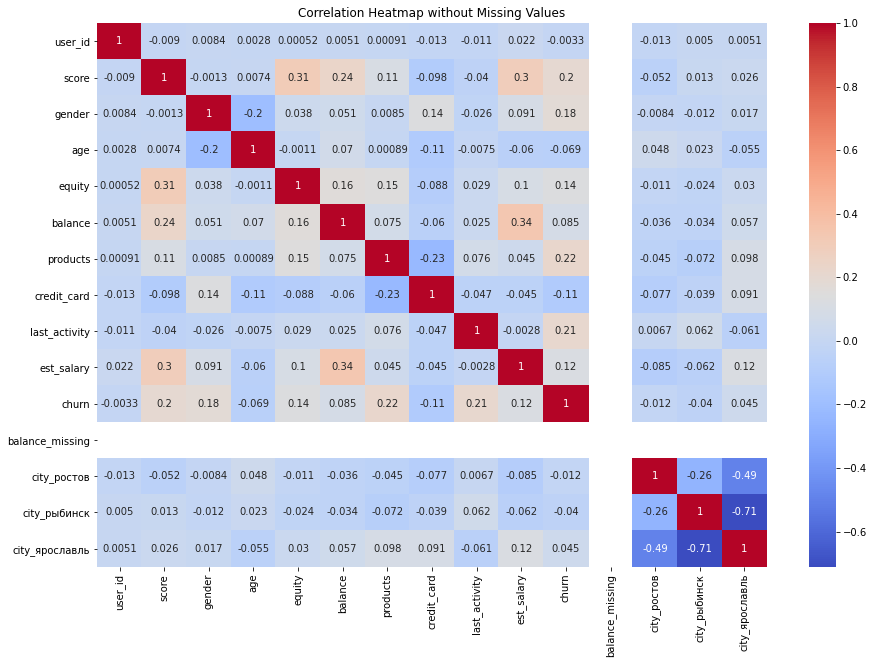

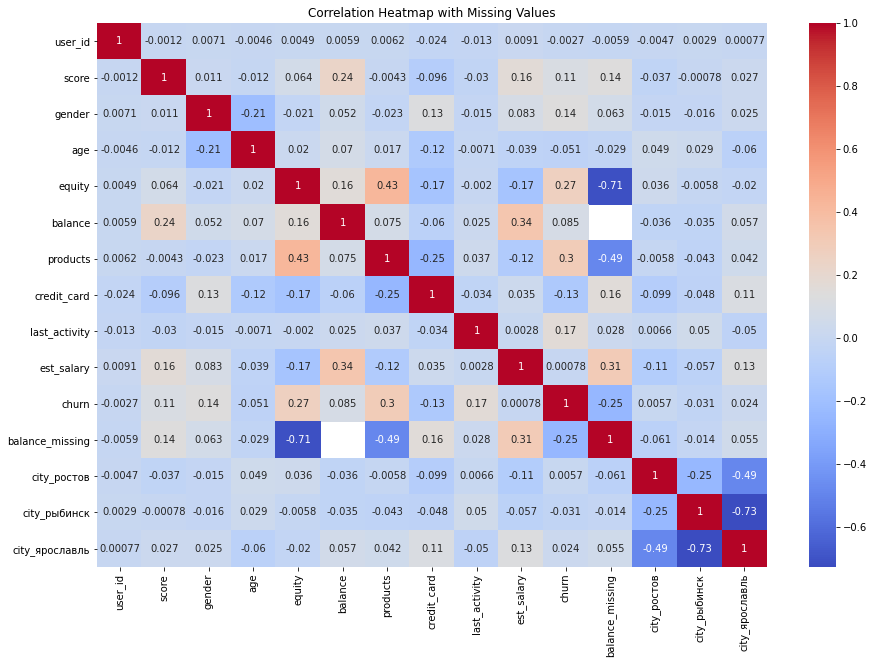

In [23]:
#копия исходного датафрейма без пропущенных значений
df_no_missing = df.dropna()

#тепловая карта корреляции
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_no_missing.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap without Missing Values')
plt.show()

#матрица пропущенных значений
missing = df.isnull()

#матрица пропущенных значений к корреляционной матрице
corr_with_missing[missing] = np.nan

#тепловая карта с корреляционной матрицей с пропущенными значениями
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_with_missing, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Missing Values')
plt.show()

In [24]:
corr_balance = corr_with_missing[['balance']].sort_values('balance',key=abs,ascending=False)
corr_all = df_no_missing.corr()[['balance']]

result = pd.concat([corr_balance, corr_all], axis=1)
result.columns = ['corr_with_missing', 'corr_without_missing']
result.style.format("{:.1%}").set_caption("Корреляции для balance")

,corr_with_missing,corr_without_missing
balance,100.0%,100.0%
est_salary,34.0%,33.9%
score,23.6%,23.5%
equity,16.3%,16.3%
churn,8.5%,8.5%
products,7.5%,7.5%
age,7.0%,7.0%
credit_card,-6.0%,-6.0%
city_ярославль,5.7%,5.7%
gender,5.2%,5.1%


In [25]:
corr_balance = corr_with_missing[['age']].sort_values('age',key=abs,ascending=False)
corr_all = df_no_missing.corr()[['age']]

result = pd.concat([corr_balance, corr_all], axis=1)
result.columns = ['corr_with_missing', 'corr_without_missing']
result.style.format("{:.1%}").set_caption("Корреляции для age")

,corr_with_missing,corr_without_missing
age,100.0%,100.0%
gender,-21.2%,-20.2%
credit_card,-12.2%,-10.9%
balance,7.0%,7.0%
city_ярославль,-6.0%,-5.5%
churn,-5.1%,-6.9%
city_ростов,4.9%,4.8%
est_salary,-3.9%,-6.0%
balance_missing,-2.9%,nan%
city_рыбинск,2.9%,2.3%


Матрица корреляций не показывает явной зависимости между столбцами с пропущенными значениями age и другими столбцами. Это может говорить о том, что пропущенные значения могут быть случайными и относиться к типу Missing Completely at Random (MCAR). Поэтому данные пропуски я удалю.

Not MCAR: The missing data are not Missing Completely At Random


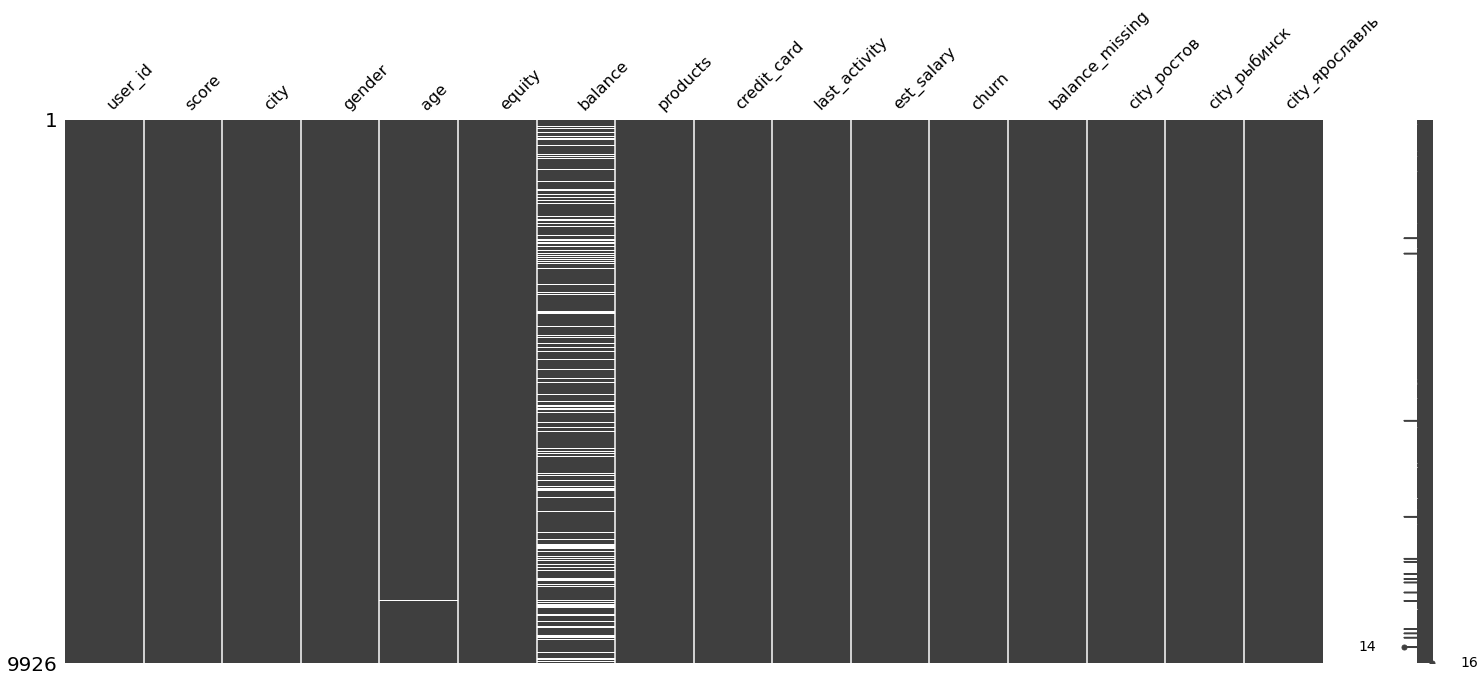

In [26]:
#реализация теста Little's MCAR
# Создание матрицы пропущенных значений
msno.matrix(df)

# Анализ распределения пропущенных значений
if np.all(pd.isna(df['age'])):
    print("MCAR: The missing data are Missing Completely At Random")
else:
    print("Not MCAR: The missing data are not Missing Completely At Random")

Not MCAR: The missing data are not Missing Completely At Random


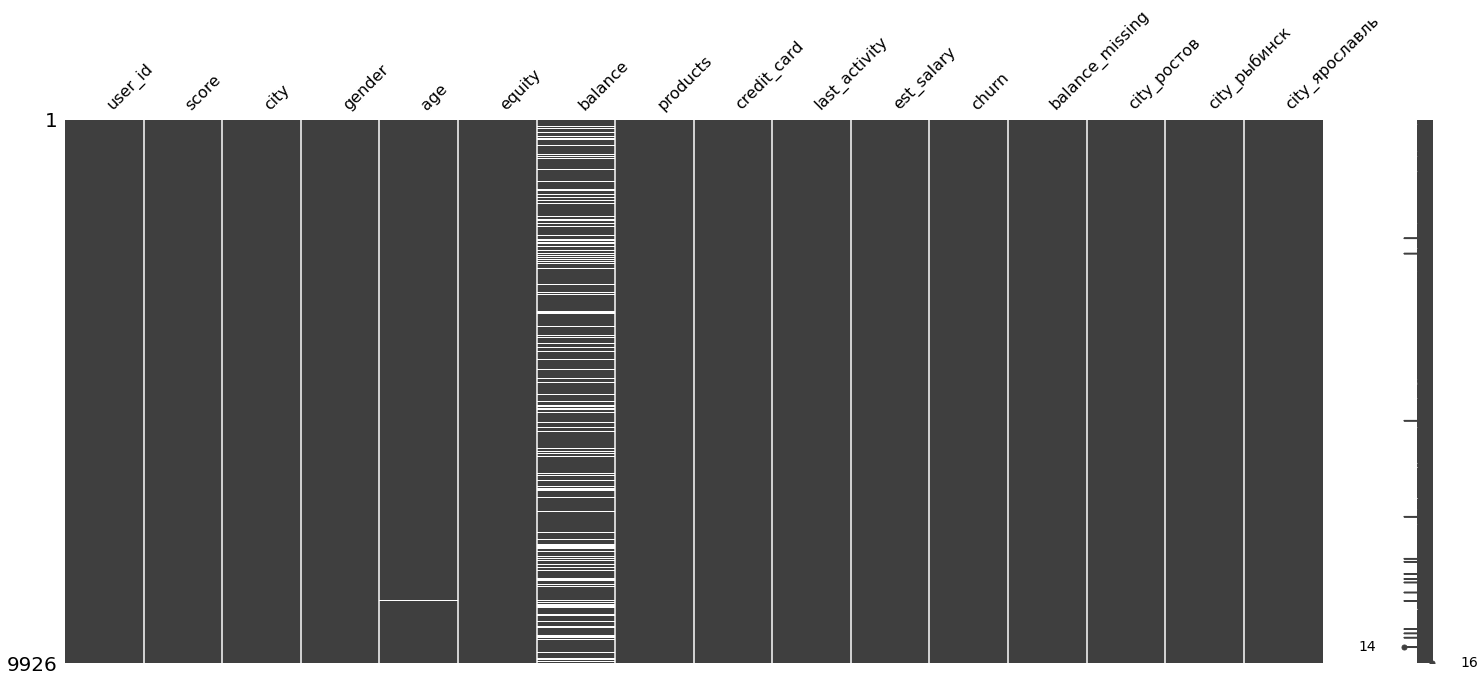

In [27]:
#реализация теста Little's MCAR
# Создание матрицы пропущенных значений
msno.matrix(df)

# Анализ распределения пропущенных значений
if np.all(pd.isna(df['balance'])):
    print("MCAR: The missing data are Missing Completely At Random")
else:
    print("Not MCAR: The missing data are not Missing Completely At Random")

Распределение строк с пропущенными значениями не повторяет распределение строк без пропусков, и, следовательно, пропуски не могут быть типом MCAR.

Тест Little's MCAR проверяет гипотезу о том, что пропущенные значения случайны и не зависят от других переменных. Он не учитывает "шум" и предполагает, что если распределение пропущенных значений повторяет распределение непропущенных значений, то пропуски имеют тип MCAR. 

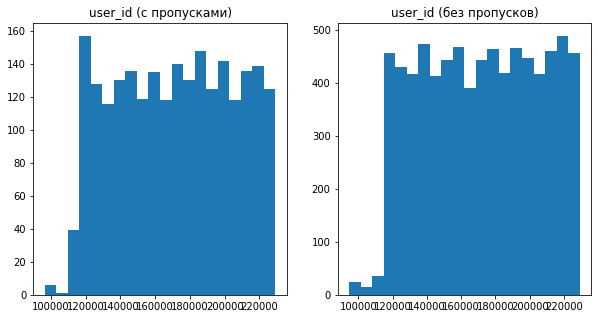

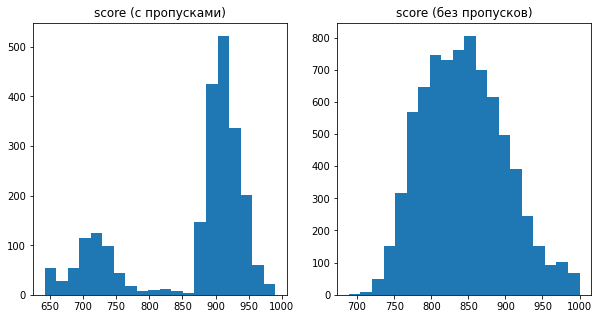

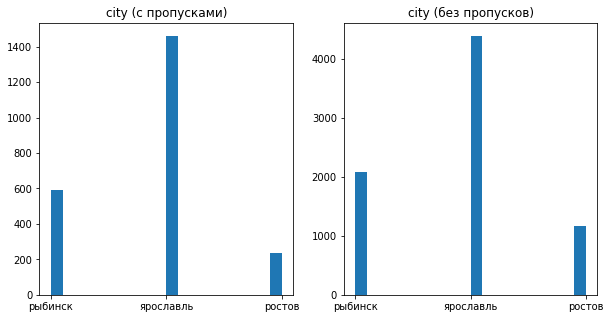

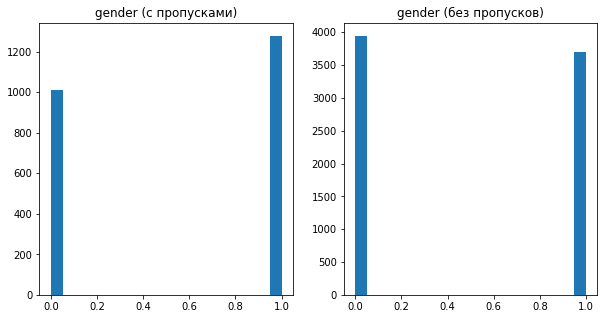

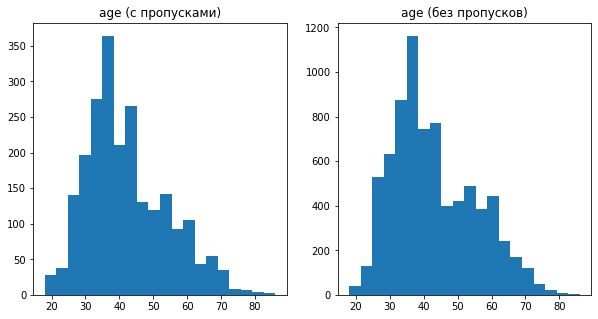

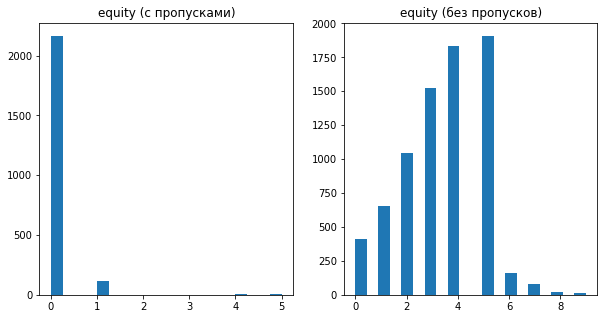

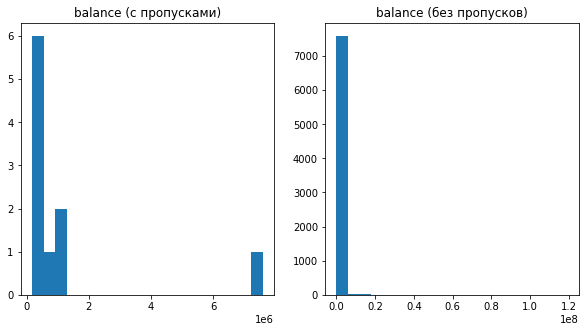

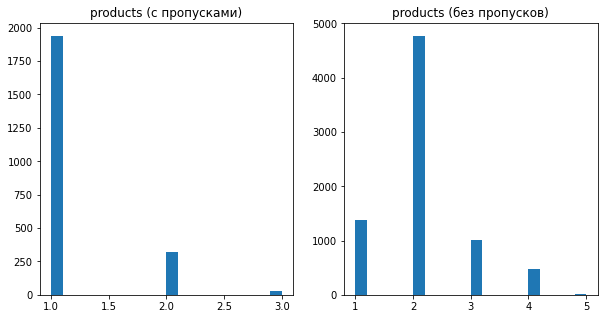

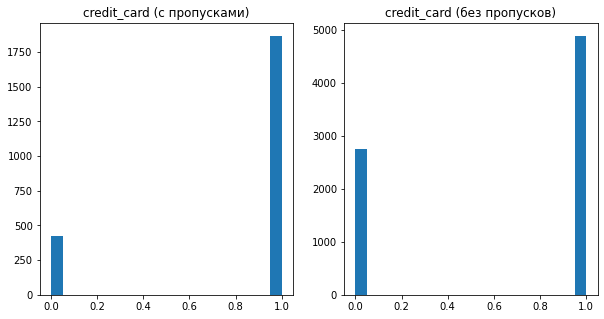

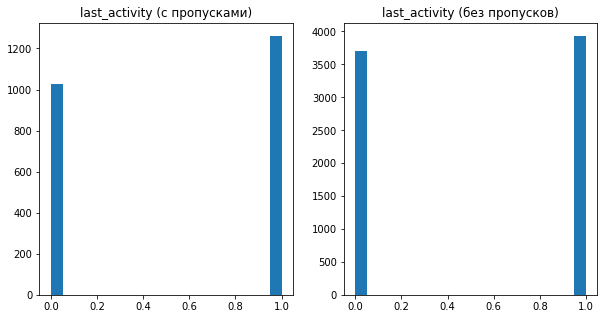

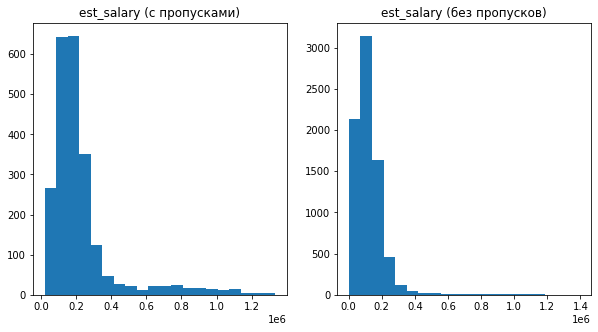

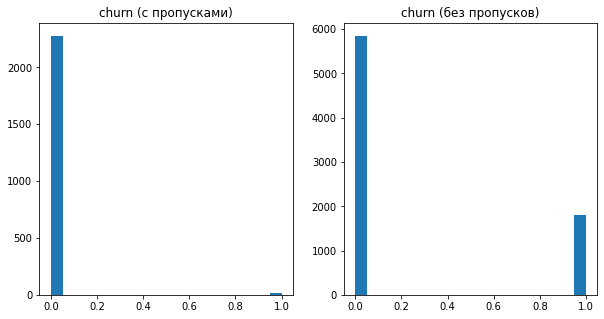

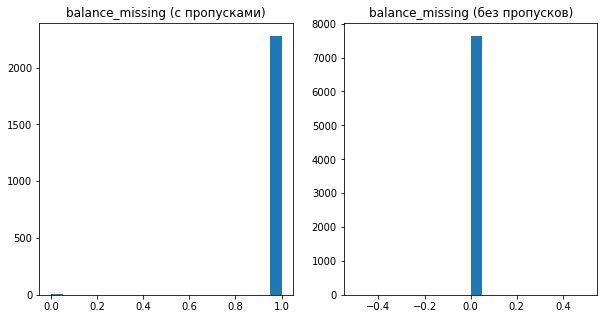

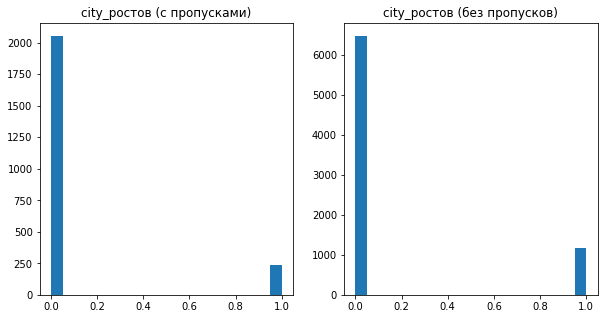

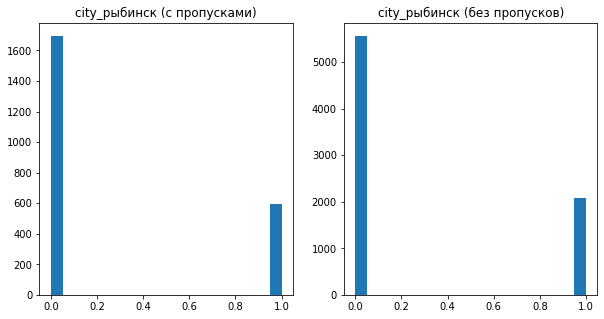

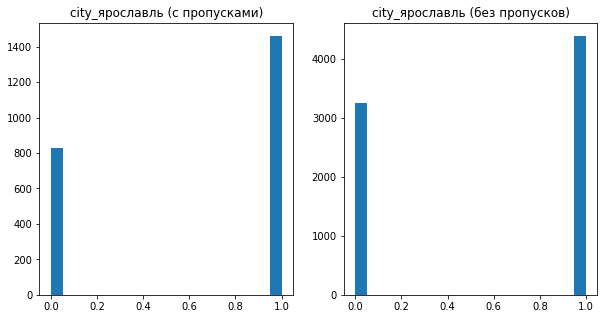

In [28]:
# Разделение на две группы: с пропусками и без пропусков
no_missing = df.dropna()
missing = df[df.isnull().any(axis=1)]

# Построение гистограмм для каждого признака
for col in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(missing[col], bins=20)
    ax[0].set_title(f"{col} (с пропусками)")
    ax[1].hist(no_missing[col], bins=20)
    ax[1].set_title(f"{col} (без пропусков)")
    plt.show()

In [29]:
#корреляции с новой фиктивной переменной, связанной с пропусками
df['missing'] = df.isnull().any(axis=1).astype(int)
corr_matrix = df.corr()
corr_with_missing = corr_matrix['missing'].sort_values(ascending=False)
corr_with_missing

missing            1.000000
balance_missing    0.997160
est_salary         0.305846
credit_card        0.158085
score              0.137414
gender             0.062638
city_ярославль     0.054347
last_activity      0.030644
balance            0.007656
user_id           -0.005082
city_рыбинск      -0.012479
age               -0.029488
city_ростов       -0.060839
churn             -0.250058
products          -0.486606
equity            -0.708010
Name: missing, dtype: float64

По результатам корреляционного анализа можно сделать вывод, что наличие пропусков в данных имеет "некоторую зависимость от некоторых признаков".

Наиболее сильная корреляция со значением "1" была выявлена с дополнительным столбцом "balance_missing", который указывает на пропуски в столбце "balance". 

Остальные признаки, которые имеют положительную корреляцию с пропусками, являются менее значимыми.

Наибольшее влияние на наличие пропусков оказывает значение equity и products. При этом, зависимость между пропущенными значениями и другими признаками не является критичной и не может быть использована для их заполнения.

То есть, перед нами пропуски типа Missing At Random (MAR).

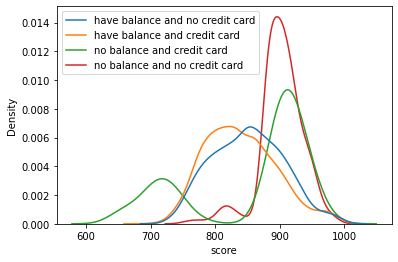

In [30]:
nan_bal_cc_groups = df.balance.isna().map({False:"have balance ",True:"no balance "})\
                  + df.credit_card.map({1:"and credit card",0:"and no credit card"})

sns.kdeplot(data=df,hue=nan_bal_cc_groups,x='score',common_norm=False);

Удаляю пропуски в age, так как их менее 5%. Пропуски в balance оставляю.

In [31]:
df = df.dropna(subset=['age'])

In [32]:
#изменим тип данных
df['age'] = df['age'].astype('int')

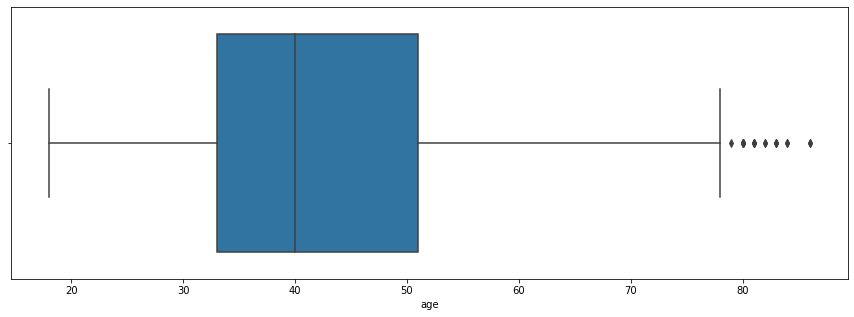

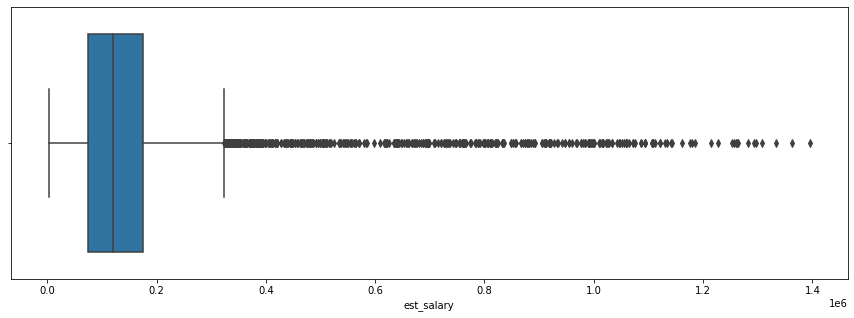

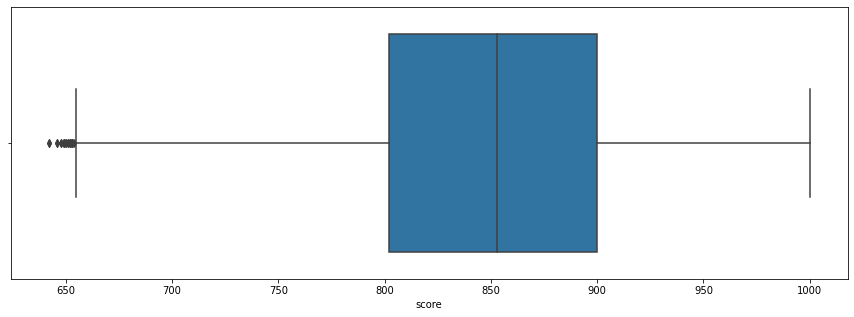

In [33]:
# строим "ящик с усами" и определяем выбросы в столбцах age, balance, estimated_salary, score
columns = ['age', 'est_salary', 'score']
for column in columns:
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=column, data=df)

    plt.show()

In [34]:
def print_outliers_boundaries(df, column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_boundary = q1 - 1.5*iqr
    upper_boundary = q3 + 1.5*iqr
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"Границы выбросов для столбца {column}: [{max(min_val, lower_boundary)}, {min(max_val, upper_boundary)}]")

In [35]:
print_outliers_boundaries(df, 'age')

Границы выбросов для столбца age: [18, 78.0]


In [36]:
age_threshold = 78
clients_over_threshold = df[df['age'] > age_threshold]
num_clients_over_threshold = len(clients_over_threshold)
percent_clients_over_threshold = round(num_clients_over_threshold / len(df) * 100, 2)

print(f"Количество клиентов старше {age_threshold} лет: {num_clients_over_threshold}")
print(f"Процент от общего числа: {percent_clients_over_threshold}%")

Количество клиентов старше 78 лет: 21
Процент от общего числа: 0.21%


In [37]:
print_outliers_boundaries(df, 'est_salary')

Границы выбросов для столбца est_salary: [2546.3, 323789.065]


In [38]:
est_salary_threshold = 323789.065
clients_over_threshold = df[df['est_salary'] > est_salary_threshold]
num_clients_over_threshold = len(clients_over_threshold)
percent_clients_over_threshold = round(num_clients_over_threshold / len(df) * 100, 2)

print(f"Количество клиентов с зарплатой выше {est_salary_threshold}: {num_clients_over_threshold}")
print(f"Процент от общего числа: {percent_clients_over_threshold}%")

Количество клиентов с зарплатой выше 323789.065: 475
Процент от общего числа: 4.8%


In [39]:
print_outliers_boundaries(df, 'score')

Границы выбросов для столбца score: [655.0, 1000]


In [40]:
score_threshold = 655
clients_over_threshold = df[df['score'] < score_threshold]
num_clients_over_threshold = len(clients_over_threshold)
percent_clients_over_threshold = round(num_clients_over_threshold / len(df) * 100, 2)

print(f"Количество клиентов с рейтингом меньше {score_threshold}: {num_clients_over_threshold}")
print(f"Процент от общего числа: {percent_clients_over_threshold}%")

Количество клиентов с рейтингом меньше 655: 33
Процент от общего числа: 0.33%


Я уберу выбросы по рейтингу и возрасту, так как в сумме их не более 5%. Est_salary оставляю без изменений, чтобы не исказить дальнейший анализ.

In [41]:
df = df.query('age <= 78 & score >= 655')

In [42]:
#еще раз проверим данные после предыдущих манипуляций
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846 entries, 0 to 9926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9846 non-null   int64  
 1   score            9846 non-null   int64  
 2   city             9846 non-null   object 
 3   gender           9846 non-null   int64  
 4   age              9846 non-null   int64  
 5   equity           9846 non-null   int64  
 6   balance          7623 non-null   float64
 7   products         9846 non-null   int64  
 8   credit_card      9846 non-null   int64  
 9   last_activity    9846 non-null   int64  
 10  est_salary       9846 non-null   float64
 11  churn            9846 non-null   int64  
 12  balance_missing  9846 non-null   int64  
 13  city_ростов      9846 non-null   uint8  
 14  city_рыбинск     9846 non-null   uint8  
 15  city_ярославль   9846 non-null   uint8  
 16  missing          9846 non-null   int64  
dtypes: float64(2),

### Промежуточный вывод

Были приведены к корректному типу данных, изменено наименований колонок (нижний регистр и "змеиный стиль".

Были удалены пропуски в столбце age, в столбце balance пропуски остались без изменения, так как велика вероятность при замене значений на медианное/среднее исказить данные, а удалить их не целесообразно из-за количества.

Были выявлены неявные дубликаты в user_id и удалены.

Часть данных была закодирована - gender и city.

## Исследовательский анализ данных

### Сравнение типичных отточных и неотточных клиентов

In [43]:
mean_values = df.drop(['user_id', 'gender', 'credit_card', 'last_activity',
                       'balance_missing', 'city_ростов', 'city_рыбинск',
                       'city_ярославль', 'missing'], axis=1).groupby('churn').mean().T

diff_percent = ((mean_values[1] / mean_values[0]) - 1) * 100

print("Средние значения для отточных и неотточных клиентов:\n", mean_values)
print()
print("Разница между средними значениями в процентном соотношении:\n")
print(diff_percent.apply(lambda x: '{:.2f}%'.format(x)))

Средние значения для отточных и неотточных клиентов:
 churn                   0             1
score       846.256560     8.634488e+02
age         42.907847      4.141440e+01
equity      2.391618       3.765097e+00
balance     735221.284947  1.135320e+06
products    1.761846       2.377285e+00
est_salary  148102.993742  1.482442e+05

Разница между средними значениями в процентном соотношении:

score         2.03% 
age           -3.48%
equity        57.43%
balance       54.42%
products      34.93%
est_salary    0.10% 
dtype: object


In [44]:
gender_counts = df.groupby('churn')['gender'].value_counts().unstack()
gender_counts

gender,0,1
churn,,
0,4278,3763
1,632,1173


In [45]:
#считаем количество клиентов каждого гендера в каждой группе
gender_counts = df.groupby(['churn', 'gender'])['user_id'].count()

#считаем общее количество клиентов каждого гендера
total_gender_counts = df['gender'].value_counts()

#рассчитываем процентное соотношение оставшихся и ушедших клиентов для каждого гендера
for gender in total_gender_counts.index:
    churn_percent = 100 * gender_counts[1, gender] / total_gender_counts[gender]
    stay_percent = 100 * gender_counts[0, gender] / total_gender_counts[gender]
    print(f"Гендер {gender}: {stay_percent:.2f}% остались, {churn_percent:.2f}% ушли")


Гендер 1: 76.24% остались, 23.76% ушли
Гендер 0: 87.13% остались, 12.87% ушли


Можно сделать вывод, что средние значения для некоторых признаков различаются у отточных и неотточных клиентов. Например, средний баланс на счете у отточных клиентов выше (1 135 320.30 против 735 221.28 у неотточных), также среднее количество продуктов у отточных клиентов выше (2.38 против 1.76 у неотточных). В то же время, средний возраст у неотточных клиентов немного выше, чем у отточных (42.91 против 41.41). Однако, для других признаков различия не столь значительны.

Для признака age среднее значение для отточных клиентов на 3.48% меньше, чем для неотточных клиентов. Для признака equity среднее значение для отточных клиентов на 57.43% больше, чем для неотточных клиентов.

У отточных клиентов баланс и число продуктов, используемых ими в банке, значительно меньше, чем у неотточных клиентов.

То есть на отток достаточно влияет и кол-во баллов собственности, и кол-во продуктов, и баланс.

Для категориальных характеристик считать среднее по отточным и оставшимся, наверно, смысла особо не имеет, поэтому мы можем просто рассмотреть количество клиентов определенного пола, которые либо ушли, либо остались.

Клиенток женского пола всего 4910. Из них ушло всего 12.87%.

Клиентов мужского пола всего 4936. Из них ушло всего 23.76%.


### Анализ распределений

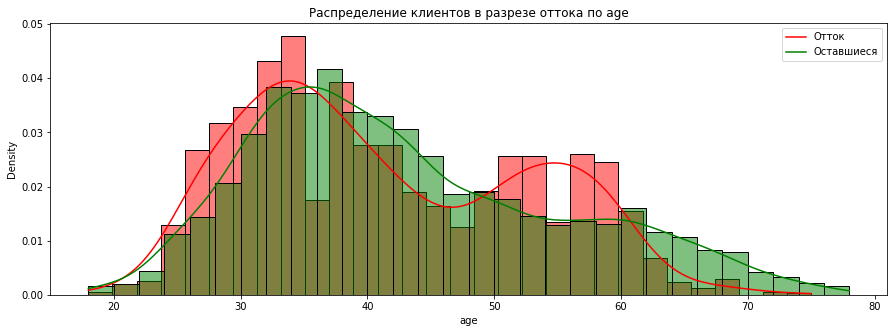

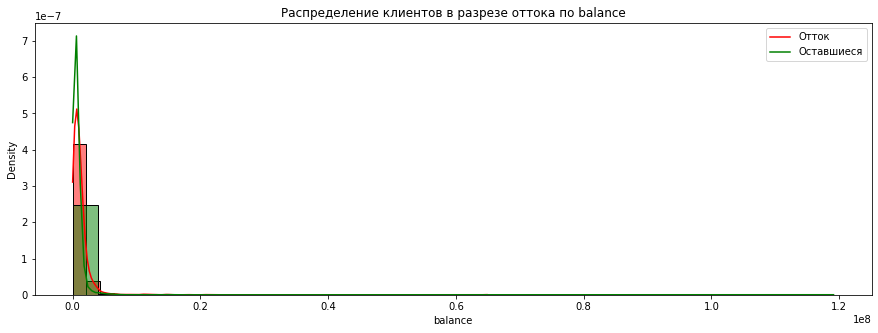

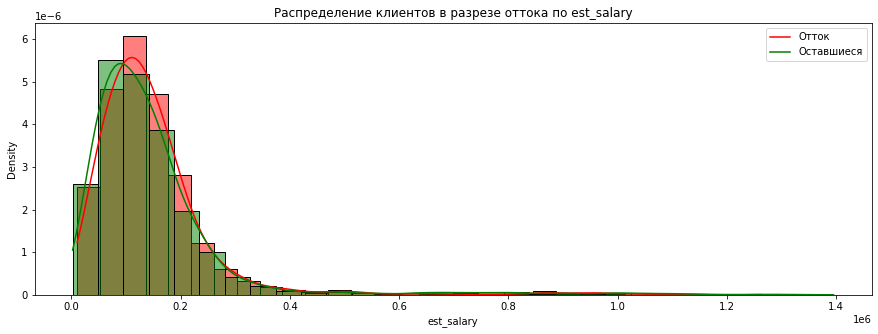

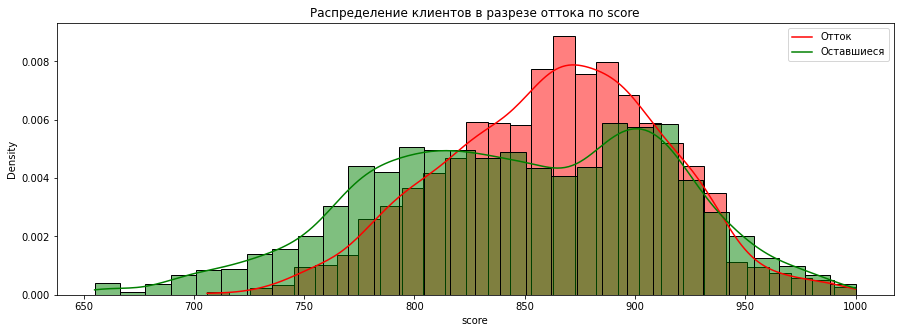

In [46]:
# Построим гистограммы для тех, кто ушел и тех, кто остался
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['age', 'balance', 'est_salary', 'score']

for column in distplot_columns: 
    plt.figure(figsize=(15,5)) 
    plt.title('Распределение клиентов в разрезе оттока по {}'.format(column))
    sns.histplot(left[column], kde=True, stat='density', common_norm=False, color='red', alpha=0.5, bins=30)
    sns.histplot(stayed[column], kde=True, stat='density', common_norm=False, color='green', alpha=0.5, bins=30)
    plt.legend(['Отток', 'Оставшиеся'])

    plt.show()

Так как график для balance получился не информативным, я построю его заново отдельно с ограничением, для оси Х.

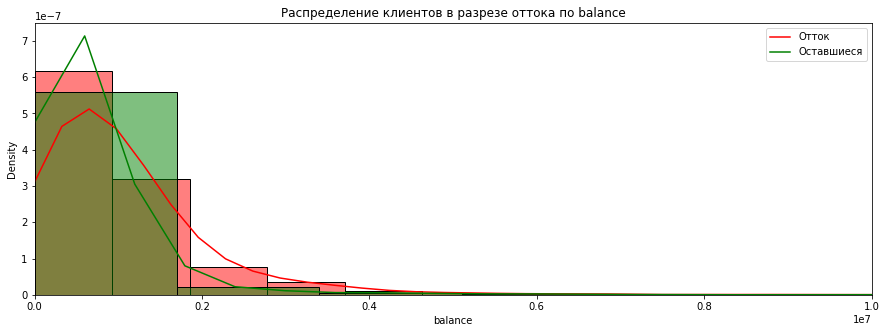

In [47]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns_1 = ['balance']

for column in distplot_columns_1: 
    plt.figure(figsize=(15,5)) 
    plt.title('Распределение клиентов в разрезе оттока по {}'.format(column))
    sns.histplot(left[column], kde=True, stat='density', common_norm=False, color='red', alpha=0.5, bins=70)
    sns.histplot(stayed[column], kde=True, stat='density', common_norm=False, color='green', alpha=0.5, bins=70)
    plt.legend(['Отток', 'Оставшиеся'])
    plt.xlim([0, 10000000])
    plt.show()


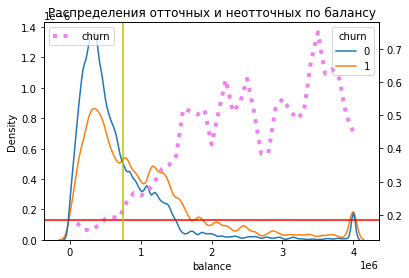

In [48]:
df_temp = df.assign(balance = df.balance.clip(0,4e6))
ax = sns.kdeplot(data = df_temp, x = 'balance', hue = 'churn', 
                 common_norm=False, bw_adjust=1/4)
ax.set(title=f"Распределения отточных и неотточных по балансу")
ax2 = ax.twinx()
df_temp.assign(balance = df_temp.balance.round(-5)).groupby('balance')\
       .agg({'churn':'mean'}).rolling(2).mean()\
       .plot(ax=ax2,color="violet",ls=":",lw=4)\
       .axhline(df_temp.churn.mean(),c='r')
ax2.axvline(7.5e5,c='y')
ax.grid(False,'both','both');

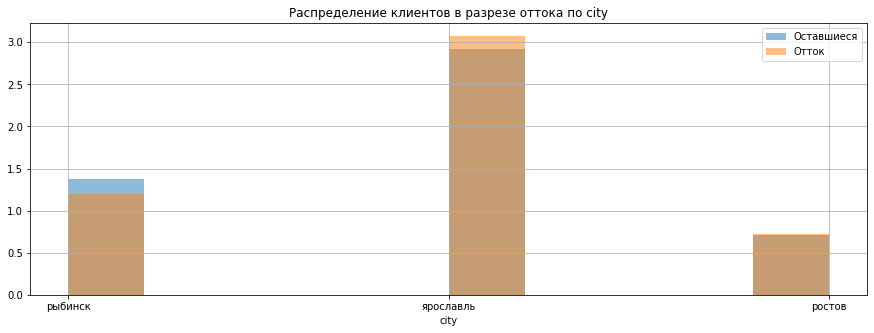

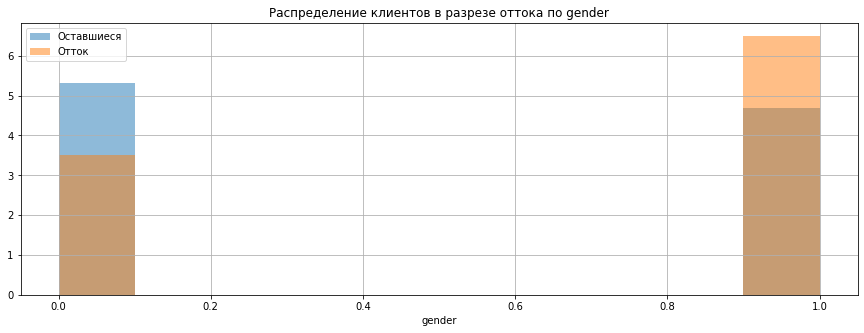

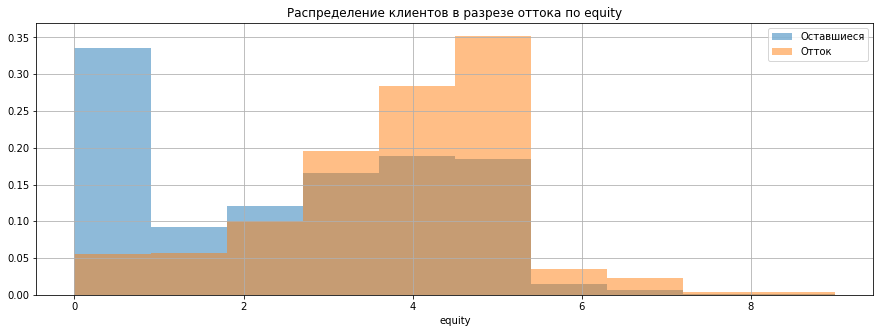

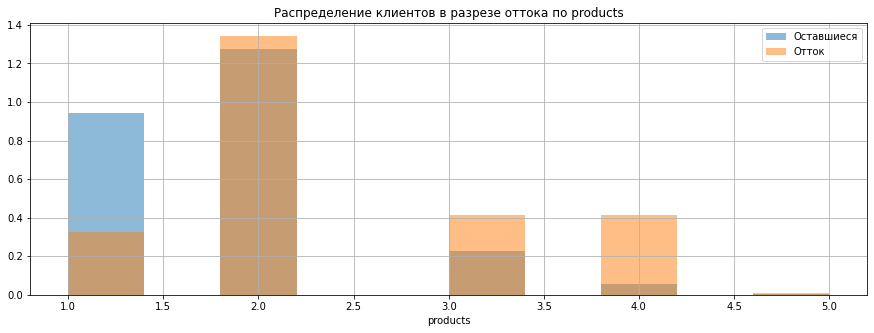

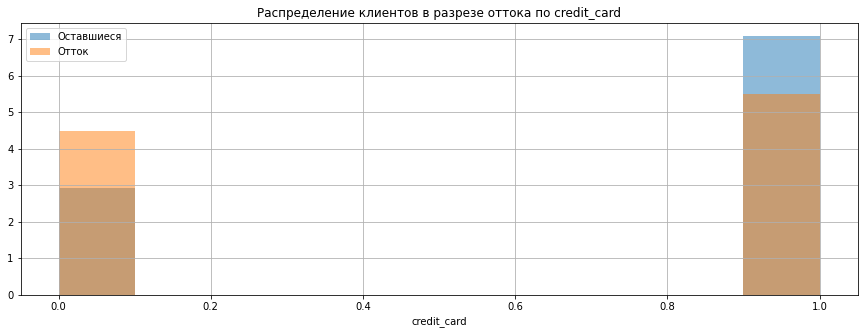

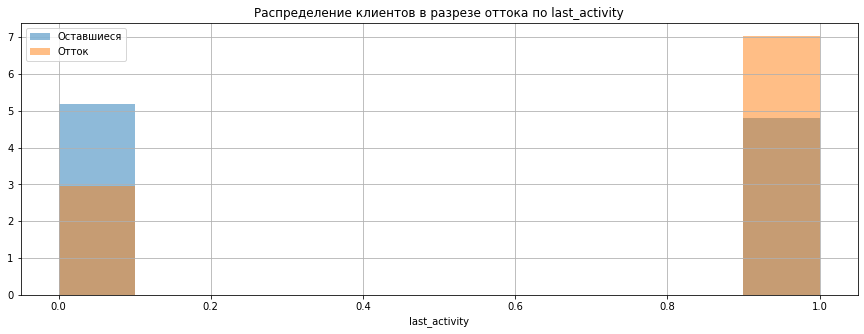

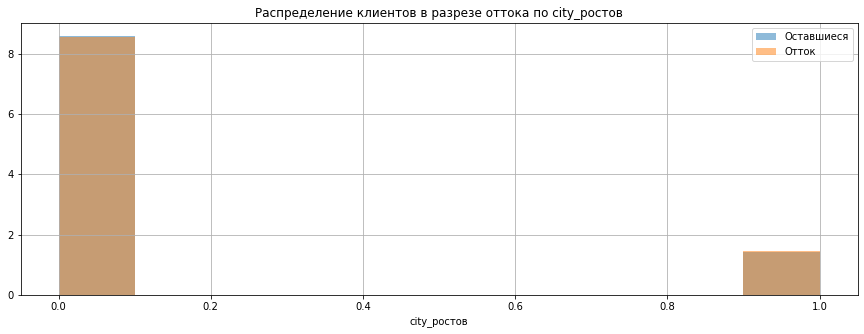

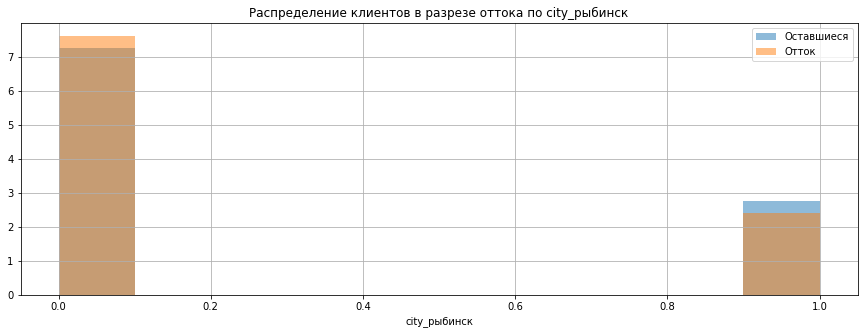

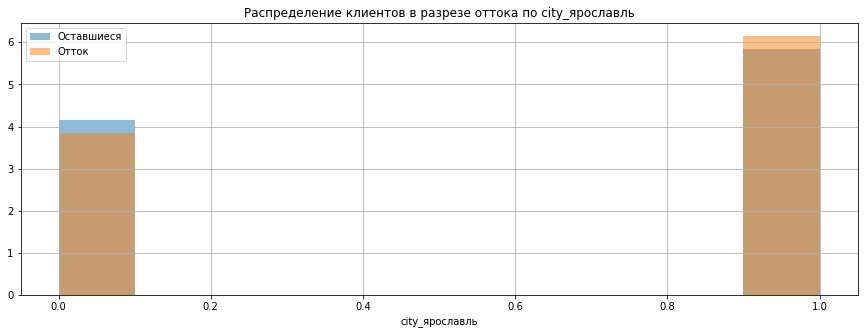

In [49]:
# Построим распределения признаков для тех, кто ушел и тех, кто остался
for column in df.columns:
    if column not in distplot_columns and column != 'user_id' and column != 'missing' and column != 'churn' and column != 'balance_missing':
        fig, ax = plt.subplots(figsize=(15,5))
        df[df['churn'] == 0][column].hist(alpha=0.5, density=True, ax=ax, label='Оставшиеся')
        df[df['churn'] == 1][column].hist(alpha=0.5, density=True, ax=ax, label='Отток')
        ax.set_title('Распределение клиентов в разрезе оттока по {}'.format(column))
        ax.set_xlabel(column)
        ax.legend()
        plt.show()

Судя по графикам, отток свойственнен клиентам от 24 до 36 лет и от 50 до 60 лет.

Если смотреть в разрезе est_salary, то отток начинается от 10^5.

По score отток от 820 до 940.

По balance отток сильный от мин суммы до ~22 * 10^5 и от 4 * 10^6.

По городам отточные клиенты из Ярославля и Ростова.

По полу более отточны мужчины.

По equity(кол-во баллов собственности) отточны клиенты от 3х баллов собственности.

По использованным продуктом отточны клиенты с 2мя продуктами и более.

По владению кредитными картами, более отточны клиенты без карт.

По last_activity более отточны активные клиенты (?).

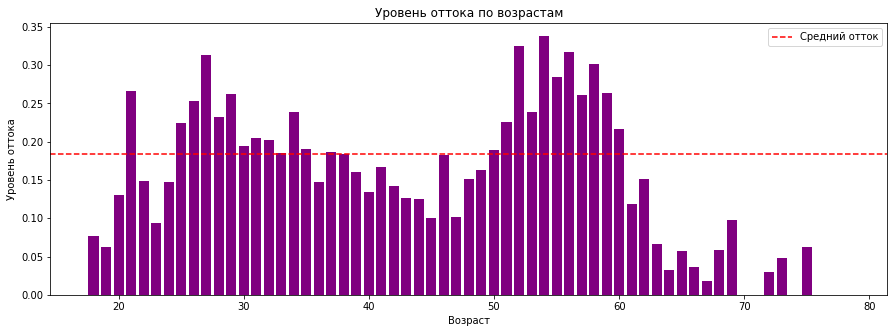

In [50]:
# Подсчет уровня оттока для каждого возраста
churn_by_age = df.groupby('age')['churn'].mean()

# Построение графика
plt.figure(figsize=(15,5))
plt.bar(churn_by_age.index, churn_by_age.values, color='purple')
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.title('Уровень оттока по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Уровень оттока')
plt.show()


Судя по графику выше среднего уровня оттока клиенты от 25 до 35 лет и от 50 до 60 лет.

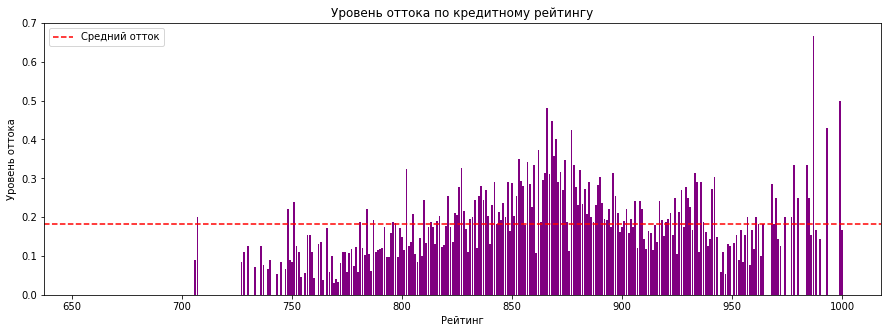

In [51]:
# Подсчет уровня оттока для score
churn_by_score = df.groupby('score')['churn'].mean()

# Построение графика
plt.figure(figsize=(15,5))
plt.bar(churn_by_score.index, churn_by_score.values, color='purple')
plt.axhline(y=df['churn'].mean(), color='red', linestyle='--', label='Средний отток')
plt.legend()
plt.title('Уровень оттока по кредитному рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Уровень оттока')
plt.show()

Судя по графику выше среднего уровня оттока клиенты с рейтингом от 800 до 940.

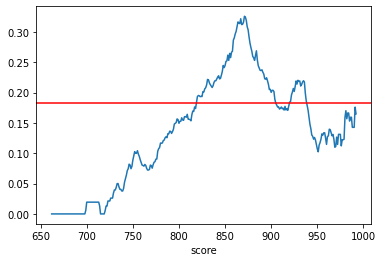

In [52]:
### КОД РЕВЬЮЕРА 2
df.groupby('score')['churn'].mean().rolling(15,center=True).mean().plot().axhline(df.churn.mean(),c='r');

In [53]:
bins = [18, 24, 35, 49, 60, 80] # границы интервалов
labels = ['18-24', '25-35', '36-49', '50-60', '61+'] # метки для категорий

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_category'] = df['age_category'].astype('object')
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,city_ростов,city_рыбинск,city_ярославль,missing,age_category
0,183012,850,рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0,0,25-35
1,146556,861,рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0,0,36-49
2,120722,892,рыбинск,0,30,0,NaN,1,1,1,107683.34,0,1,0,1,0,1,25-35
3,225363,866,ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,0,50-60
4,157978,730,ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,0,1,0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,120553,860,ярославль,0,41,4,1317459.84,3,0,0,117341.52,0,0,0,0,1,0,36-49
9923,139170,860,рыбинск,1,30,5,605635.33,1,1,1,99368.24,0,0,0,1,0,0,25-35
9924,115639,767,рыбинск,0,37,1,228626.27,2,0,1,96652.79,0,0,0,1,0,0,36-49
9925,148700,817,ростов,1,44,5,826860.86,2,0,1,98024.46,0,0,1,0,0,0,36-49


### Анализ корреляций

In [55]:
#кодирование возраста
dummies = pd.get_dummies(df['age_category'], prefix='age_category')
df = pd.concat([df, dummies], axis=1)

In [56]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,city_ростов,city_рыбинск,city_ярославль,missing,age_category,age_category_18-24,age_category_25-35,age_category_36-49,age_category_50-60,age_category_61+
0,183012,850,рыбинск,0,25,1,59214.82,2,0,1,...,0,1,0,0,25-35,0,1,0,0,0
1,146556,861,рыбинск,0,37,5,850594.33,3,1,0,...,0,1,0,0,36-49,0,0,1,0,0
2,120722,892,рыбинск,0,30,0,NaN,1,1,1,...,0,1,0,1,25-35,0,1,0,0,0
3,225363,866,ярославль,0,51,5,1524746.26,2,0,1,...,0,0,1,0,50-60,0,0,0,1,0
4,157978,730,ярославль,1,34,5,174.00,1,1,0,...,0,0,1,0,25-35,0,1,0,0,0


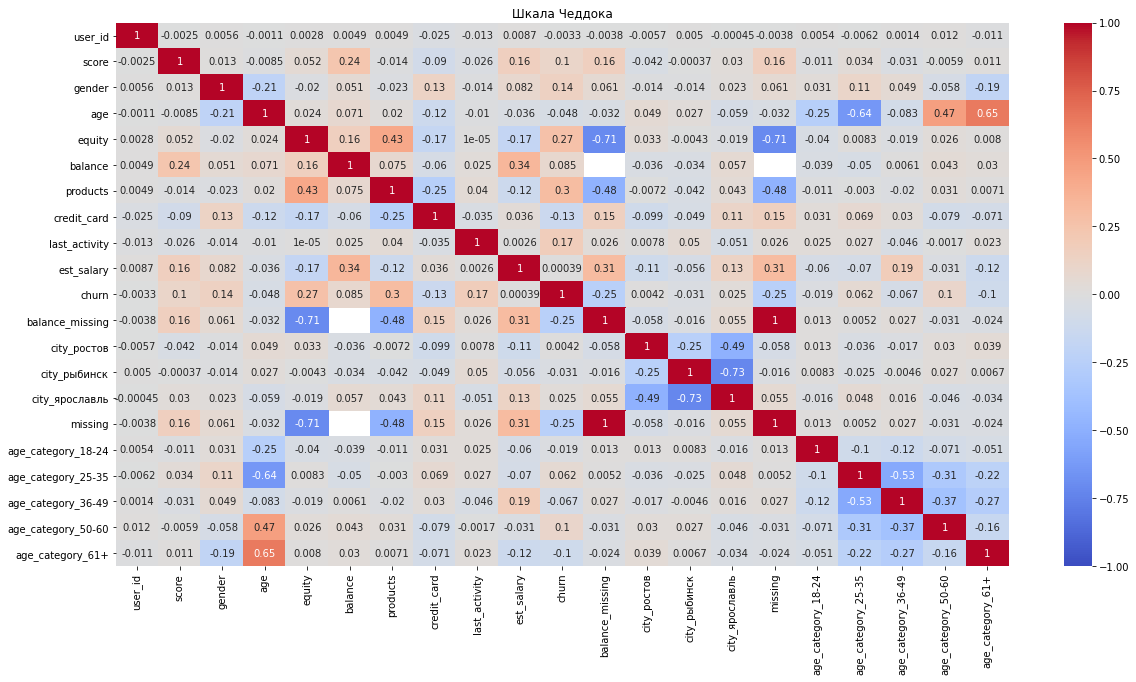

In [57]:
# создаем корреляционную матрицу
corr_matrix = df.corr()

# рисуем график шкалы Чеддока
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Шкала Чеддока")
plt.show()

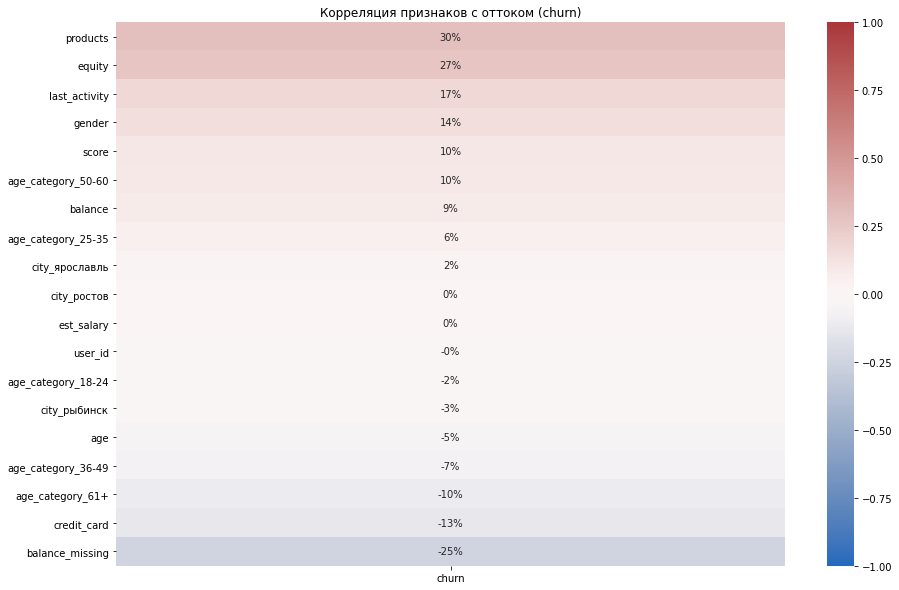

In [58]:
# создаем новый DataFrame без признака missing
df_no_missing = df.drop('missing', axis=1)

# создаем корреляционную матрицу
corr_matrix = df_no_missing.corr()

# отбираем только столбец корреляций с целевой переменной churn
churn_corr = corr_matrix['churn'].drop('churn')

# сортируем 
churn_corr_sorted = churn_corr.sort_values(ascending=False)

# применяем маску, чтобы убрать корреляцию меньше 0.047, так как они неинформативны и занимают место
#mask = churn_corr_sorted >= 0.047
#churn_corr_sorted = churn_corr_sorted[mask]

# отрисовываем heatmap для столбца churn_corr_sorted
plt.figure(figsize=(15,10))
sns.heatmap(churn_corr_sorted.to_frame(), annot=True, cmap='vlag', fmt = ".0%", vmin=-1, vmax=1, center=0) #square=True
plt.title("Корреляция признаков с оттоком (churn)")
plt.show()


In [59]:
#матрица корреляции для Churn
corr_ = df.corr()
churn_corr = corr_.loc[:, 'churn']
churn_corr.sort_values(ascending=False)

churn                 1.000000
products              0.300593
equity                0.268444
last_activity         0.172159
gender                0.140754
score                 0.103177
age_category_50-60    0.099631
balance               0.085328
age_category_25-35    0.061592
city_ярославль        0.024638
city_ростов           0.004158
est_salary            0.000391
user_id              -0.003333
age_category_18-24   -0.018915
city_рыбинск         -0.030623
age                  -0.047964
age_category_36-49   -0.066771
age_category_61+     -0.102247
credit_card          -0.131180
balance_missing      -0.248319
missing              -0.248319
Name: churn, dtype: float64

### Составление портретов уходящих клиентов

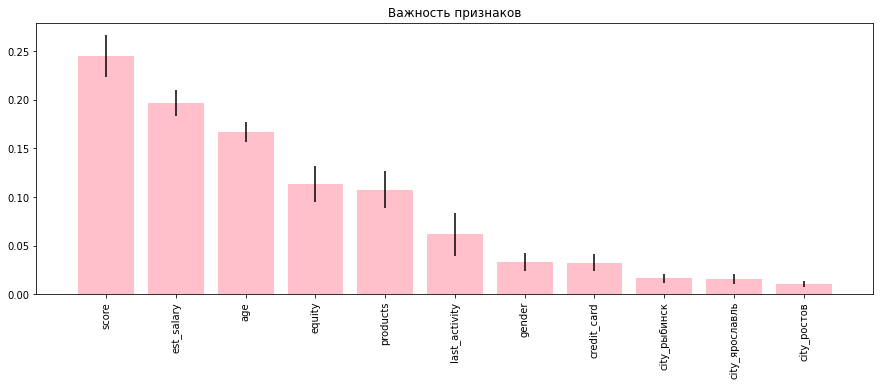

In [60]:
#анализ важности признаков для предсказания оттока клиентов

num_cols = ['credit_card', 'last_activity', 'score', 'age', 'products', 'city_ростов',
            'city_рыбинск', 'city_ярославль', 'equity', 'gender', 'est_salary']
df_num = df[num_cols]

rf = RandomForestClassifier(n_estimators=100, random_state=42)

X = df_num
y = df['churn']

rf.fit(X, y)

# Определяем важность каждого признака
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(15,5))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], color="pink", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Исходя из важности признаков, для составления портретов уходящий пользователей и дальнейшей сегментации, можно выделить:
* score - от 800 до 940,
* est_salary - от 10^5,
* age - от 24 до 36 лет и от 50 до 60 лет,
* equity - от 3,
* products - от 2,
* last_activity - активные,
* gender - мужчины,
* credit_cart - нет карт,
* по городам - Ярославль и Ростов.

### Промежуточный вывод

* отток больше для клиентов без кредитных карт,
* по продуктам отток начинается от 2х продуктов, 
* кол-во собственности от 3х,
* больший отток у клиентов, чей возраст от 24 до 36 лет и от 50 до 60 лет,
* по половому составу, у клиентов мужского пола больше отток,
* по рейтингу от 800 до 940.

Также стоит учитывать влияние на отток баланса - от мин суммы до ~22 * 10^5 и от 4 * 10^6.

По городам это Ярославль и Ростов.

## Статистический анализ данных

**Гипотеза №1: о различие доходов оставшихся и отточных клиентов**

Сформулируем нулевую и альтернативную гипотезы:

* H₀: средние доходы оставшихся и отточных клиентов равны
* H₁: средние доходы оставшихся и отточных клиентов не равны

In [61]:
def test_normality(data, alpha=0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print('Распределение - нормальное')
    else:
        print('Распределение - не нормальное')

In [62]:
test_normality(df[df['churn'] == 1]['est_salary'])

Распределение - не нормальное


Критерий Манна-Уитни является непараметрическим критерием, то есть он не требует предположений о распределении данных, в отличие от t-критерия и бутстрапа. Это особенно важно в случае, когда распределение данных неизвестно или отклоняется от нормального распределения. Поэтому буду использовать его.

In [63]:
# Функция для вычисления статистики (среднего значения) по подвыборке
def bootstrap_mean(df):
    alpha=0.05
    return np.mean(np.random.choice(df, size=len(df)))

# Создание массивов данных для оставшихся и отточных клиентов
data_stayed = df[df['churn']==0]['est_salary']
data_churned = df[df['churn']==1]['est_salary']

# Вычисление среднего значения для оставшихся и отточных клиентов
mean_stayed = np.mean(data_stayed)
mean_churned = np.mean(data_churned)

# Число повторений бутстрапа
n_iter = 10000

# Создание массивов статистик для оставшихся и отточных клиентов
stat_stayed = np.array([bootstrap_mean(data_stayed) for i in range(n_iter)])
stat_churned = np.array([bootstrap_mean(data_churned) for i in range(n_iter)])

# Вычисление разности между средними значениями
diff = mean_stayed - mean_churned

# Вычисление p-value
p_value = np.sum(np.abs(stat_stayed - stat_churned) >= np.abs(diff)) / n_iter

# Вывод результата
alpha=0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.9672
Не получилось отвергнуть нулевую гипотезу


Из этого следует, что можно предполагать, что разница в средних доходах оставшихся и отточных клиентов незначительна.


Наш первый выбор это t-критерий Стьюдента при сравнении средних. Часто встречается утверждение что он требует нормального распределения. Это частично так, но так как выборки большие, то нам неважно, что значения в них распределены ненормально, мы можем использовать t-критерий. Требование нормальности распределения происходит из медицинской литературы, где традиционно маленькие выборки. 
    
<blockquote>Выборочные средние должны быть нормально распределены.
А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Очень часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста это необязательно.</blockquote>
Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов, так как это не робастный критерий. Но выбросы можно отфильтровать.

При разном размере выборок, который нам тут известен мы ставим equal_var в положение False просто из-за особенностей работы метода ttest_ind. И вообще, надёжнее при любых сомнениях ставить его в это положение, это лишь немного снижает мощность данного стат критерия. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. В литературе встречаются утверждения, что его нельзя проводить, если есть значительное число повторяющихся значений или если выборки большие, однако это относится, видимо, к старым реализациям теста.

Основной минус критерия Манна-Уитни — его слабая интерпретируемость для бизнеса. Если мы сраниваем суммы покупок, то t-критерий позволяет нам сравнить средний чек — величину, которую можно перевести в выручку, умножив на количество покупок. U-критерий же, по сути, будет сравнивать медианный чек, который практически не используется.
</div>

In [64]:
# Создание массивов данных для оставшихся и отточных клиентов
data_stayed = df[df['churn'] == 0]['est_salary']
data_churned = df[df['churn'] == 1]['est_salary']

# Вычисление медианы для оставшихся и отточных клиентов
median_stayed = np.median(data_stayed)
median_churned = np.median(data_churned)

# Проверка гипотезы о равенстве медиан при помощи теста Манна-Уитни
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(data_stayed, data_churned, alternative='two-sided')

# Вывод результата
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.0004295856111719104
Отвергаем нулевую гипотезу


Значение p-value равное 0.0012178170248593797 означает вероятность получения такого или более экстремального результата, если нулевая гипотеза верна. В данном случае, если нулевая гипотеза о равенстве медиан двух выборок верна, то вероятность получить различия в медианах такие или еще более выраженные, как в наблюдаемых данных, составляет 0.0012178170248593797. Таким образом, это достаточно низкое значение, что говорит о том, что различия в медианах между группами статистически значимы.

Если p-value меньше уровня значимости alpha (обычно равного 0.05), то нулевая гипотеза отвергается в пользу альтернативной гипотезы, которая говорит о наличии различий между группами. В данном случае, p-value меньше alpha, что позволяет нам отвергнуть нулевую гипотезу о равенстве медиан двух выборок.

Из этого следует, что при проверке гипотезы тестом Манна-Уитни, нулевая гипотеза была отвергнута. Разница в зарплатах есть.

**Гипотеза №2: о различие в наличии или отсутствии кредитной карты**

Сформулируем нулевую и альтернативную гипотезы:

* H₀: среднее количество кредитных карт у оставшихся и отточных клиентов равны
* H₁: среднее количество кредитных карт у оставшихся и отточных клиентов не равны

In [65]:
test_normality(df[df['churn'] == 1]['credit_card'])

Распределение - не нормальное


In [66]:
# Найти количество клиентов, оставшихся и ушедших, у которых есть кредитная карта
n_stayed = df[df['churn'] == 0]['credit_card'].count()
n_churned = df[df['churn'] == 1]['credit_card'].count()

# Найти количество клиентов, оставшихся и ушедших, у которых нет кредитной карты
n_stayed_no_cc = df[(df['churn'] == 0) & (df['credit_card'] == 0)]['credit_card'].count()
n_churned_no_cc = df[(df['churn'] == 1) & (df['credit_card'] == 0)]['credit_card'].count()

# Найти доли для каждой генеральной совокупности
p_stayed_cc = (n_stayed - n_stayed_no_cc) / n_stayed
p_churned_cc = (n_churned - n_churned_no_cc) / n_churned

# Найти стандартную ошибку разности долей
SE = np.sqrt(p_stayed_cc * (1 - p_stayed_cc) / n_stayed + p_churned_cc * (1 - p_churned_cc) / n_churned)

# Найти z-статистику
z = (p_stayed_cc - p_churned_cc) / SE

# Найти p-значение
from scipy.stats import norm
p_value = 2 * norm.cdf(-np.abs(z))

# Вывод результата
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 2.576621136595709e-35
Отвергаем нулевую гипотезу


Из этого следует, что можно предполагать, что разница в среднем кол-во кредитных карт у оставшихся и отточных клиентов присутсвует.

**Гипотеза №3: о различие в количестве используемых банковских продуктов**

Сформулируем нулевую и альтернативную гипотезы:

* H₀: среднее количество используемых банковских продуктов оставшихся и отточных клиентов равны
* H₁: среднее количество используемых банковских продуктов оставшихся и отточных клиентов не равны

In [67]:
test_normality(df[df['churn'] == 1]['products'])

Распределение - не нормальное



        Проверка нормальности распределения значений необходима для того, чтобы убедиться, что результаты теста будут точными и надежными. Если распределение значений не нормальное, то мы не можем использовать t-критерий для сравнения выборок и должны вместо этого использовать другие методы статистического анализа.
    
При работе с t-критерием нужно проверить нормальность распределения значений в сравниваемых выборках:

 * t-критерий Стьюдента для независимых выборок: если распределение не является нормальным, то результаты теста могут быть неточными или даже ошибочными.

* t-критерий Стьюдента для зависимых выборок : Нормальность распределения в этом случае важна, так как тест основан на разнице между парами значений в каждой выборке.


In [68]:
# Создание массивов данных для оставшихся и отточных клиентов
data_stayed = df[df['churn'] == 0]['products']
data_churned = df[df['churn'] == 1]['products']

# Вычисление медианы для оставшихся и отточных клиентов
median_stayed = np.median(data_stayed)
median_churned = np.median(data_churned)

# Проверка гипотезы о равенстве медиан при помощи теста Манна-Уитни
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(data_stayed, data_churned, alternative='two-sided')

# Вывод результата
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 7.776784334039207e-159
Отвергаем нулевую гипотезу


Из этого следует, что можно предполагать, что разница в среднем кол-ве используемых продуктов у оставшихся и отточных клиентов присутствует.

**Гипотеза №4: о различие в оценке объектов собственности отточных и оставшихся клиентов**

Сформулируем нулевую и альтернативную гипотезы:

* H₀: средние оценки собственности оставшихся и отточных клиентов равны
* H₁: средние оценки собственности оставшихся и отточных клиентов не равны

In [69]:
test_normality(df[df['churn'] == 1]['equity'])

Распределение - не нормальное


In [70]:
# Создание массивов данных для оставшихся и отточных клиентов
data_stayed = df[df['churn'] == 0]['equity']
data_churned = df[df['churn'] == 1]['equity']

# Вычисление медианы для оставшихся и отточных клиентов
median_stayed = np.median(data_stayed)
median_churned = np.median(data_churned)

# Проверка гипотезы о равенстве медиан при помощи теста Манна-Уитни
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(data_stayed, data_churned, alternative='two-sided')

# Вывод результата
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 2.0147087056811535e-153
Отвергаем нулевую гипотезу


In [71]:
df.groupby('churn').agg({"equity":"mean"})

,equity
churn,
0,2.391618
1,3.765097


**Гипотеза №5: о различие в кредитном рейтинге**

Сформулируем нулевую и альтернативную гипотезы:

* H₀: средний кредитный рейтинг оставшихся и отточных клиентов равны
* H₁: средний кредитный рейтинг оставшихся и отточных клиентов не равны

In [72]:
test_normality(df[df['churn'] == 1]['score'])

Распределение - не нормальное


In [73]:
# Создание массивов данных для оставшихся и отточных клиентов
data_stayed = df[df['churn'] == 0]['score']
data_churned = df[df['churn'] == 1]['score']

# Вычисление медианы для оставшихся и отточных клиентов
median_stayed = np.median(data_stayed)
median_churned = np.median(data_churned)

# Проверка гипотезы о равенстве медиан при помощи теста Манна-Уитни
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(data_stayed, data_churned, alternative='two-sided')

# Вывод результата
alpha = 0.05
print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 5.3920708438085146e-21
Отвергаем нулевую гипотезу


Из этого следует, что можно предполагать, что разница в среднем кол-ве собственности у оставшихся и отточных клиентов присутствует.

### Промежуточный вывод

Было сформулировано 5 гипотез:
* средние доходы оставшихся и отточных клиентов равны,
* среднее количество кредитных карт у оставшихся и отточных клиентов равны,
* среднее количество используемых банковских продуктов оставшихся и отточных клиентов равны,
* средние оценки собственности оставшихся и отточных клиентов равны,
* средний кредитный рейтинг оставшихся и отточных клиентов равны.

Было выявленено, что распределение - не нормальное, поэтому был использован тест Манна-Уитни и в одном случае z-теста на пропорции, которое не требует предположения о нормальности распределения.

В итоге все нулевые гипотезы были отвергнуты.


|Показатель |Сравнение портретов/гипотезы|Корреляции|Распределения в разрезе оттока|
| :--- | :---: | :---: | :--- |
|неизвестный 1|есть связь         |нет связи | отточный интервал с __ по __ |
|неизвестный 2|не может быть связи         | |  |
|user_id    |не может быть связи|нет связи|           нет                 |
|score      |есть связь|связь незначительная| отточный интервал с 800 по 940 |
|city       |есть связь|связь незначительная| Ярославль, Ростов             |
|gender     |есть связь|есть связь| отточный интервал из мужчин|
|age        |есть связь|связь незначительная|отточный интервал с 24 по 36, с 50 по 60|
|equity     |есть связь|есть связь|отточный интервал с 3|
|balance    |есть связь|связь незначительная|отточный интервал с 0 по ~22 * 10^5 и от 4 * 10^6 |
|products   |есть связь|есть связь|отточный интервал с 2|
|credit_card|есть связь|есть связь|отточный интервал - нет карты|
|last_activity|есть связь|есть связь|отточный интервал - активные|
|est_salary |есть связь|нет связи|отточный интервал с 10^5|
</div>

## Сегментация пользователей и их приоритизация

In [74]:
def segment_info(df, conditions):
    """
    Функция принимает на вход датафрейм и условия для сегментирования.
    Возвращает информацию о сегменте (количество клиентов в сегменте и процент оттока), 
    а также информацию о том, превышает ли отток в данном сегменте в 2 раза средний отток по всему датафрейму.
    """
    segment = df.query(conditions)
    n_customers = len(segment)
    churn_rate = segment['churn'].mean()
    overall_churn_rate = df['churn'].mean()
    
    if churn_rate > 2 * overall_churn_rate:
        print(f"Отток данного сегмента ({n_customers} клиентов) более чем в 2 раза больше, чем в банке в среднем")
    else:
        print(f"Отток данного сегмента ({n_customers} клиентов) не превышает в 2 раза отток по всему датафрейму")
    
    print(f"Процент оттока в данном сегменте: {round(churn_rate * 100, 2)}%")

In [75]:
def plot_churn(segment):
    # Получаем количество оставшихся и ушедших пользователей в сегменте
    stayed = segment['churn'].value_counts()[0]
    churned = segment['churn'].value_counts()[1]
    
    # Строим круговую диаграмму
    plt.pie([stayed, churned], labels=['Оставшиеся', 'Отток'], autopct='%1.2f%%')
    plt.title('Круговая диаграмма оттока для сегмента')
    plt.axis('equal')
    plt.show()

### Делаем сегментацию

In [76]:
segment_info(df, "score >= 800 & score <= 940 & age>= 24 & age <= 35 & last_activity == 1")

Отток данного сегмента (1210 клиентов) более чем в 2 раза больше, чем в банке в среднем
Процент оттока в данном сегменте: 40.41%


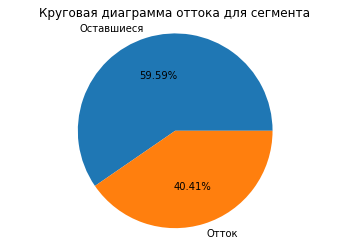

In [77]:
segment1 = df.query("score >= 800 & score <= 940 & age>= 24 & age <= 35 & last_activity == 1")
plot_churn(segment1)

In [78]:
segment_info(df, "gender ==1 & credit_card == 0 & equity >=3 & products >=2")

Отток данного сегмента (849 клиентов) более чем в 2 раза больше, чем в банке в среднем
Процент оттока в данном сегменте: 47.94%


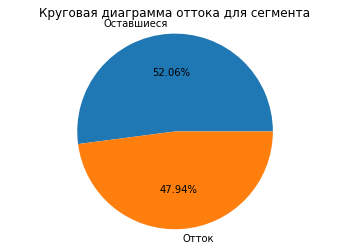

In [79]:
segment2 = df.query("gender ==1 & credit_card == 0 & equity >=3 & products >=2")
plot_churn(segment2)

In [80]:
segment_info(df, "age>= 50 & age <= 60 & balance <= 2200000 & est_salary >= 100000")

Отток данного сегмента (593 клиентов) более чем в 2 раза больше, чем в банке в среднем
Процент оттока в данном сегменте: 36.76%


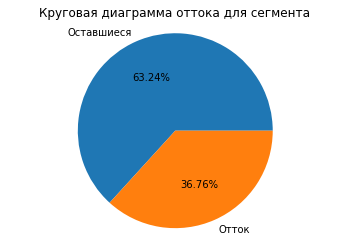

In [81]:
segment3 = df.query("age>= 50 & age <= 60 & balance <= 2200000 & est_salary >= 100000")
plot_churn(segment3)

Приоритизация сегментов пользователей: 

1. Пол - мужской, не пользуется кредитной картой, кол-во баллов собственности больше/равно 3, пользуется 2мя и более продуктами банка. 894 клиента, процент оттока в данном сегменте: 47.94%.
2. Кредитный рейтинг от 800 до 940, возраст от 24 до 35 лет включительно, активные клиенты. 1210 клиента, процент оттока в данном сегменте: 40.41%.
2. Возраст от 50 до 60 лет включительно, баланс менее или равно 2200000, доход от 100000. 593 клиента, процент оттока в данном сегменте: 36.76%.

 

### Промежуточный вывод

В итоге имеем следующую сегментацию пользователей:
1. Пол - мужской, не пользуется кредитной картой, кол-во баллов собственности больше/равно 3, пользуется 2мя и более продуктами банка. 894 клиента, процент оттока в данном сегменте: 47.94%.
2. Кредитный рейтинг от 800 до 940, возраст от 24 до 35 лет включительно, активные клиенты. 1210 клиента, процент оттока в данном сегменте: 40.41%.
3. Возраст от 50 до 60 лет включительно, баланс менее или равно 2200000, доход от 100000. 593 клиента, процент оттока в данном сегменте: 36.76%.

## Итоговые выводы и рекомендации по каждому из сегментов

Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток. Корреляция с показателем оттока равна:

* products              0.300593
* equity                0.268444
* last_activity         0.172159
* gender                0.140754
* score                 0.103177
* age_category_61+     -0.102247
* credit_card          -0.131180
* balance_missing      -0.248319


Судя по графикам:

* отток больше для клиентов без кредитных карт,
* по продуктам отток начинается от 2х продуктов, 
* кол-во собственности от 3х,
* больший отток у клиентов, чей возраст от 24 до 36 лет и от 50 до 60 лет,
* по половому составу, у клиентов мужского пола больше отток,
* по рейтингу от 800 до 940.

Также стоит учитывать влияние на отток баланса - от мин суммы до ~22 * 10^5 и от 4 * 10^6.

Было сформулировано 5 гипотез:
* средние доходы оставшихся и отточных клиентов равны,
* среднее количество кредитных карт у оставшихся и отточных клиентов равны,
* среднее количество используемых банковских продуктов оставшихся и отточных клиентов равны,
* средние оценки собственности оставшихся и отточных клиентов равны,
* средний кредитный рейтинг оставшихся и отточных клиентов равны.

Было выявленено, что распределение - не нормальное, поэтому был использован тест Манна-Уитни и в одном случае z-теста на пропорции, которое не требует предположения о нормальности распределения.

В итоге все нулевые гипотезы были отвергнуты.

Также стоит отметить, что данные по balance были с пропусками, что может повлиять на корректность анализа.

**Для отдела маркетинга:**

* По первому сегменту:

`Пол - мужской, не пользуется кредитной картой, кол-во баллов собственности больше/равно 3, пользуется 2мя и более продуктами банка. 894 клиента, процент оттока в данном сегменте: 47.94%..`


1. Для мужской аудитории которая не пользуется кредитной картой, имеет кол-во баллов собственности от 3х и пользуется 2мя и более продуктами банка, стоит предложить программу лояльности и персональные условия по кредитованию. 
2. Также можно предложить кредитную карту с низкими процентными ставками и возможностью увеличения лимита по кредитной карте.
3. Важно также предоставить специальные условия по страхованию объектов собственности. 


* По второму сегменту:

`Кредитный рейтинг от 800 до 940, возраст от 24 до 35 лет включительно, активные клиенты. 1210 клиента, процент оттока в данном сегменте: 40.41%.`

1. Для аудитории среднего возраста, которая пользуется кредитной картой, но использует не более 2х продуктов, стоит уделить внимание продуктам, которые могут заинтересовать данную аудиторию, например, кредиты на образование или автокредиты. 
2. Также можно предложить программу лояльности для удержания клиентов и предложить персональные условия по кредитованию.

* По третьему сегменту:

`Возраст от 50 до 60 лет включительно, баланс менее или равно 2200000, доход от 100000. 593 клиента, процент оттока в данном сегменте: 36.76%.`

1. Для аудитории старшего возраста, можно предложить перевести пенсию в данный банк. 
2. Можно предложить бонусную программу (если не реализована) за траты с карты данного банка, а также высокие проценты за вклады.
3. Также можно предложить инвестиционные продукты с высокой доходностью и дополнительными услугами, которые могут быть интересны данной аудитории.



**Важно обеспечить высокий уровень сервиса и дружелюбное обслуживание, чтобы удерживать клиентов в банке.**